##### Iskanje strukture v podatkih

Podatkovno rudarjenje, naloga, `5.4.2019`  
**`Aljaž Debelak`**

# Search for structure in data

Data mining, assignment, `<INSERT DATE>`  
**`<INSERT Name and surname>`**

Z modeliranjem skušamo poiskati strukturo v podatkih. Z metodami nenadzorovanga modeliranja skušamo poiskati skupine podobnih podatkov oz. skupine primerov.

V nalogi boste uporabili modeliranje verjetnostnih porazdelitev za iskanje osamelcev ter metode za iskanje skupin podobnih primerov (gručenje).

By modeling, we try to find structure in the data. Using unsupervised modeling methods, we try to find groups of similar data or cases.

In this homework you will use modeling of probability distributions for searching for outliers and methods for finding groups of similar cases (clustering).

### Podatki

Opis podatkovne zbirke MovieLens ostaja enak prvi nalogi.

### Data

The description of the MovieLens database remains the same as for the first homework.

### Vprašanja

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne toliko implementacija vaše rešitve.

### Questions

By using the principles you have learned on exercises and lectures, answer the 
following questions. For each question, think carefully about the best way to give, show or justify the answer. The essential part is the answers to the
questions and not so much the implementation of your solution.

In [1]:
#PODATKI ENAKI KOT V PRVI NALOGI + userID in movieID pri rating

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import t as student 
from scipy.stats import beta
from scipy.stats import multivariate_normal as mvn 
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch


movies_id = []
movies_title = {}
movies_genres = {}
movies_ratings = {}
movieId_time = {}
movies_cast = {}
user_movies_ratings = {}
all_users = []

with open('podatki/ml-latest-small/movies.csv',encoding="utf8") as file:
    file.readline()
    for line in file:
        genres = []
        if line.split(',')[-1] != "":
            genres = line.split(',')[-1].split("|")
            genres[-1] = genres[-1].replace("\n", "")
        
        movieId = int(line.split(',')[0])       
        movies_id.append(movieId)
        movies_title[movieId] = "".join(line.split(',')[1:-1]).replace('"','')
        movies_genres[movieId] = genres
        movies_ratings[movieId] = []
        movieId_time[movieId] = []

with open('podatki/ml-latest-small/ratings.csv',encoding="utf8") as file:
    file.readline()
    for line in file:
        user=int(line.split(',')[0])
        movie=int(line.split(',')[1])
        rtng=float(line.split(',')[2])
        timestmp=int(line.split(',')[3])
        
        movies_ratings[movie].append(rtng)
        movieId_time[movie].append([rtng,timestmp])
        
        if movie not in user_movies_ratings:
            user_movies_ratings[movie]=[]
        user_movies_ratings[movie].append([user,rtng])
        if user not in all_users:
            all_users.append(user)
        
with open('podatki/ml-latest-small/cast.csv',encoding="utf8") as file:
    file.readline()
    for line in file:
        movies_cast[int(line.split(',')[0])] = (line.split(',')[1].split('|'))
             

#### 1. Iskanje osamelcev (50%) 
O ocenah katerih filmov so si uporabniki najmanj enotni? Povedano drugače, za katere filme so pripadajoče ocene najbolj razpršene?

Formuliraj problem kot modeliranje verjetnostne porazdelitve. Premisli o naslednjih vprašanjih, naredi ustrezne poizkuse in odgovori.

#### 1. Finding outliers (50%)
About the ratings of which movies are the users the least unified? In other words, for which films are the corresponding scores the most dispersed?

Formulate the problem as modeling the probability distribution. Think about the following questions, make the appropriate experiments and answers.

In [2]:
movies_ratings_variance = {}
for movieId in movies_id:
    if len(movies_ratings[movieId]) < 10:
        continue
    movies_ratings_variance[movieId] = float(np.var(movies_ratings[movieId]))

sorted_movies_ratings_variance = sorted(movies_ratings_variance.items(), key=lambda x: x[1], reverse=True)

for i in range(10):
    sorted_movies_ratings_variance[i][0]
    print(movies_title[sorted_movies_ratings_variance[i][0]], ": ", sorted_movies_ratings_variance[i][1])

Cook the Thief His Wife & Her Lover The (1989) :  2.481994459833795
Killing Zoe (1994) :  2.3024999999999998
Deadpool (2016) :  2.2932098765432096
Event Horizon (1997) :  2.215500945179584
Great Expectations (1998) :  2.1622222222222223
Dead Man (1995) :  2.15702479338843
Dungeons & Dragons (2000) :  2.0900000000000003
The Hunger Games: Mockingjay - Part 1 (2014) :  2.09
Christmas Carol A (1938) :  2.0661157024793386
Aeon Flux (2005) :  2.056213017751479


#### 1.1. vprašanje:

Katera je ustrezna naključna spremenljivka (količina) v podatkih, ki odgovarja na vprašanje?        

Varianca, saj nam pove kako so ocene razporejene okrog povprečja. Uporabil sem ocene filmov

#### 1.1. question:

What is the appropriate random variable (quantity) in the data that answers the question?

Odgovor: Varianca nam pove kako so ocene razporejene okrog povprečja. Uporabil sem ocene filmov

Answer: **You can write the answer in multiple cells**

#### 1.2. vprašanje:
Nariši njeno porazdelitev, npr., s pomočjo histograma.

#### 1.2. question:
Draw its distribution, for example, using a histogram.

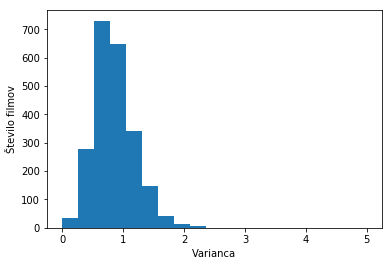

In [3]:
plt.figure()
plt.hist(movies_ratings_variance.values(), bins=np.linspace(0,5,20))
plt.ylabel("Število filmov")
plt.xlabel("Varianca")
plt.show()

Odgovor: **odgovor lahko zapišete v več celic**

Answer: **You can write the answer in multiple cells**

#### 1.3. vprašanje:

Ali porazdelitev spominja na kakšno znano porazdelitev? Ali je porazdelitev morda normalna ali katera druga? 

#### 1.3. question:

Does the distribution remind you of a known distribution? Is the distribution possibly normal or some other?

In [4]:
# kodo lahko razdelite v več celic

Odgovor: Porazdelitev spominja na desni del normalne porazdelitve čes sredino

Answer: **You can write the answer in multiple cells**

#### 1.4. vprašanje:

Oceni parametre te porazdelitve s pomočjo postopkov, ki smo jih spoznali na vajah.  Izmed porazdelitev, ki smo jih spoznali na vajah, izberi tisto, ki se podatkom najbolj prilega.        

#### 1.4. question:

Assess the parameters of this distribution by means of the procedures we have learned at the exercises. From the distributions we have learned at the exercises, choose the one that best fits the data.

C:\Users\AzzySloPc\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(9.780376439862534, 690996.8802215112, -0.1667214002638213, 72384.59727243271)


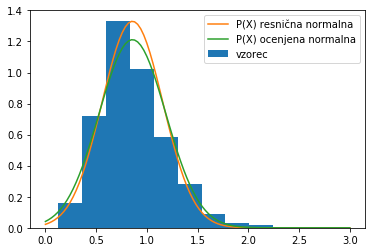

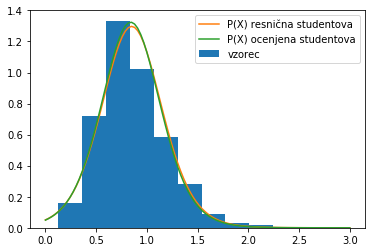

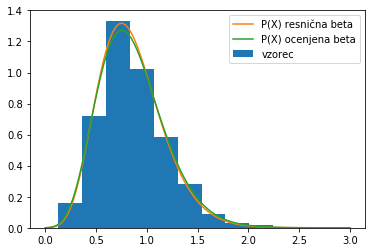

In [5]:
n = len(movies_ratings_variance.values())
xr = np.linspace(0, 3, 100) 

varianceNumbers=list(movies_ratings_variance.values())

mu= np.mean(varianceNumbers)
sig2= np.var(varianceNumbers)

P_normalna  = [mvn.pdf(x, mu, 0.09) for x in xr] 
P_fit_normalna = [mvn.pdf(x, mu, sig2 ) for x in xr]

pars = student.fit(varianceNumbers)
P_studentova = [student.pdf(x, *[10,0.85,0.3]) for x in xr]
P_fit_studentova = [student.pdf(x, *pars) for x in xr ]

pars = beta.fit(varianceNumbers)
print(pars)
P_beta  = [beta.pdf(x, *[10, 700000, -0.15, 70000]) for x in xr]
P_fit_beta = [beta.pdf(x, *pars) for x in xr ]

plt.figure()
plt.hist(movies_ratings_variance.values(),    label="vzorec", density=True)
plt.plot(xr, P_normalna,     label="P(X) resnična normalna")
plt.plot(xr, P_fit_normalna, label="P(X) ocenjena normalna")
plt.legend()

plt.figure()
plt.hist(movies_ratings_variance.values(),    label="vzorec", density=True)
plt.plot(xr, P_studentova,     label="P(X) resnična studentova")
plt.plot(xr, P_fit_studentova, label="P(X) ocenjena studentova")
plt.legend()

plt.figure()
plt.hist(movies_ratings_variance.values(),    label="vzorec", density=True)
plt.plot(xr, P_beta, label="P(X) resnična beta")
plt.plot(xr, P_fit_beta, label="P(X) ocenjena beta")
plt.legend()
plt.draw();

Odgovor: **odgovor lahko zapišete v več celic**

Answer: **You can write the answer in multiple cells**

#### 1.5. vprašanje:

Izpiši filme z vrednostjo naključne spremenljivke, ki spada v zgornjih 5% statistično značilnih primerov. 

#### 1.5. question:

Print movies with the value of a random variable that falls in the top 5% of the statistically significant cases.

In [6]:
limit = (5/100) * len(movies_ratings_variance.keys())
for i in range (int(limit)):
    print(movies_title[sorted_movies_ratings_variance[i][0]])

Cook the Thief His Wife & Her Lover The (1989)
Killing Zoe (1994)
Deadpool (2016)
Event Horizon (1997)
Great Expectations (1998)
Dead Man (1995)
Dungeons & Dragons (2000)
The Hunger Games: Mockingjay - Part 1 (2014)
Christmas Carol A (1938)
Aeon Flux (2005)
Stalker (1979)
Grudge The (2004)
Joe Dirt (2001)
Eraserhead (1977)
Solaris (Solyaris) (1972)
Celebration The (Festen) (1998)
Battlestar Galactica (2003)
Brokeback Mountain (2005)
Saw (2004)
Patch Adams (1998)
Mad Max: Fury Road (2015)
Andalusian Dog An (Chien andalou Un) (1929)
Pirates of the Caribbean: On Stranger Tides (2011)
Fountain The (2006)
Bicentennial Man (1999)
Psycho (1998)
Vanya on 42nd Street (1994)
13 Going on 30 (2004)
Twilight (2008)
Behind Enemy Lines (2001)
Frailty (2001)
Blair Witch Project The (1999)
Little Nicky (2000)
Sid and Nancy (1986)
Sky Captain and the World of Tomorrow (2004)
Twin Peaks: Fire Walk with Me (1992)
Life Aquatic with Steve Zissou The (2004)
Drive Me Crazy (1999)
Nutty Professor II: The Klump

Odgovor: **odgovor lahko zapišete v več celic**

Answer: **You can write the answer in multiple cells**

#### 2. Gručenje filmov (50%)

Priporočilni sistemi pogosto odkrivajo skupine predmetov (v našem primeru filme), za katere velja visoka podobnost. 

Poiščite 100 najbolj gledanih filmov. Ali med njimi obstajajo skupine?
Uporabite ustrezen algoritem za gručenje. Na film lahko gledamo kot vektor, kjer je  
število komponent enako številu uporabnikov. 

Vektorji vsebujejo tudi *neznane vrednosti*.
Primer vektorjev za deset filmov prikazuje spodnja tabela.

Algoritme gručenja lahko izvajamo v izvornem prostoru (koordinatni sistem filmi-uporabniki) ali pa filme primerjamo z merami podobnosti, ki smo jih spoznali na vajah. 
Premisli, kateri način je primernejši glede na obliko podatkov.

#### 2. Clustering films (50%)

Recommendation systems often detect groups of objects (in our example films), which are of high similarity.

Find the 100 most watched movies. Are there groups among them?
Use the appropriate clustering algorithm. We can watch the film as a vector where the
number of components is equal to the number of users.

Vectors also contain *unknown values*.
An example of the vectors for ten films is shown in the table below.

Clustering algorithms can be performed in the original space (the coordinate system films-users), or we can compare the films with the similarities we have learned on the exercises.
Think about which method is more appropriate in terms of the data format.

| x          |Movie                                      | $u_0$ |$u_1$ | $u_2$ | $\cdots$ |
|------------|-------------------------------------------|:-----:|:----:|:------|:--------:|
|$\vec{x_0}$ | Fight Club (1999)                         | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_1}$ | Twelve Monkeys (a.k.a. 12 Monkeys) (1995) | ?     | ?    | 2.5   | $\cdots$ |
|$\vec{x_2}$ | Independence Day (a.k.a. ID4) (1996)      | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_3}$ | Dances with  Wolves (1990)                | 4.0   | ?    | ?     | $\cdots$ |
|$\vec{x_4}$ | Fargo (1996)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_5}$ | Speed (1994)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_6}$ | Apollo 13 (1995)                          | ?     | 2.0  | ?     | $\cdots$ |
|$\vec{x_7}$ | Seven (a.k.a. Se7en) (1995)               | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_8}$ | Sixth Sense, The (1999)                   | 3.0   | ?    | 4.0   | $\cdots$ |
|$\vec{x_9}$ | Aladdin (1992)                            | ?     | ?    | ?     | $\cdots$ |
|$\cdots$    | $\cdots$                                  | $\cdots$ | $\cdots$  | $\cdots$ | $\cdots$ |

Pri tem odgovori na naslednja vprašanja.

In doing so, answer the following questions.

#### 2.1. vprašanje:

Utemelji izbiro algoritma in mere podobnosti.

#### 2.1. question:

Justify the choice of algorithm and similarity measures.

Odgovor: **Uporabil bom algoritem metoda voditeljev**

Answer: **You can write the answer in multiple cells**

#### 2.2. vprašanje:

Koliko skupin filmov je med izbranimi? Ali poznamo kvantitativne ocene za različne možnosti razvrščanja v skupine?

#### 2.2. question:

How many groups of films are among the selected? Do we know the quantitative estimates for the various grouping options?

In [7]:
# kodo lahko razdelite v več celic

 Odgovor: **Med izbranimi so tri skupine filmov. Skupine so razdeljene na ocene**

Answer: **You can write the answer in multiple cells**

#### 2.3. vprašanje:

Prikaži rezultate z uporabo ustrezne vizualizacije.

#### 2.3. question:

Display results using an appropriate visualization.

In [8]:
top100_watched_movies_ratings={}
for i,j in movies_ratings.items():
    if (movies_ratings[i]==0):
        continue
    top100_watched_movies_ratings[i] = len(j)
sorted_top100_watched_movies_ratings = sorted(top100_watched_movies_ratings.items(), key=lambda x: x[1], reverse=True)


x=float('nan')

top100_allUser_movies_ratings={}
for i in range(100):
    movieId = sorted_top100_watched_movies_ratings[i][0]
    top100_allUser_movies_ratings[movieId] = list(np.linspace(0,0,len(all_users)))
    
    for user, rating in user_movies_ratings[movieId]:
        top100_allUser_movies_ratings[movieId][user-1]=rating
    
    
    #for i in top100_allUser_movies_ratings[movieId]:
    #    tmp = top100_allUser_movies_ratings[movieId]
    #    top100_allUser_movies_ratings[movieId] = [x if x != 0 else float('nan') for x in tmp]
    
data = [i for i in top100_allUser_movies_ratings.values()]

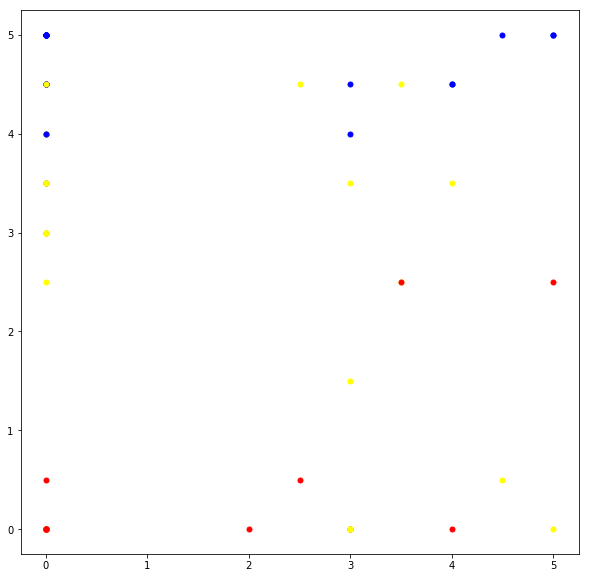

[[0.         2.45714286 0.65714286 ... 0.08571429 0.65714286 0.71428571]
 [0.         0.65217391 1.23913043 ... 0.2173913  1.30434783 1.84782609]
 [0.         0.         0.9047619  ... 0.28571429 0.42857143 2.4047619 ]]


In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
plt.figure(figsize=(10, 10))
color = {0:"red", 1:"blue", 2:"yellow"}
for c, x in zip(kmeans.labels_, data):
    plt.plot(x[2], x[16], ".", color=color[c], markersize=10.0)
plt.show()
print(kmeans.cluster_centers_)

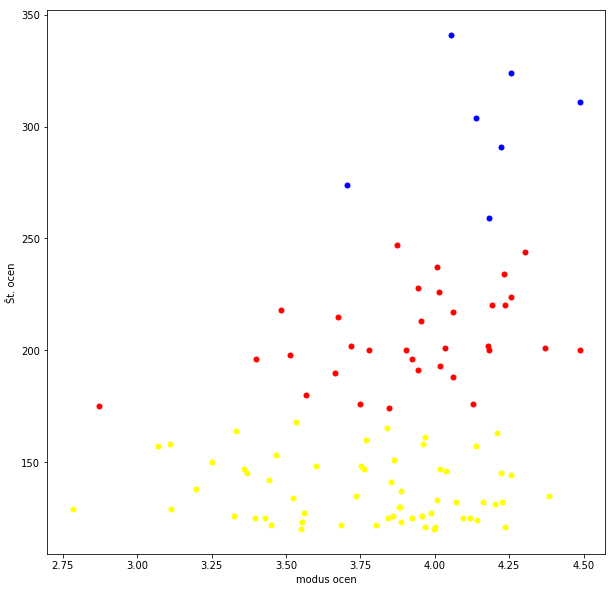

[[205.51515152   3.92643725]
 [300.57142857   4.14956753]
 [137.38333333   3.76696126]]


In [10]:
data2=[]

top100_movies_User_and_varRatings={}
for i in range(100):
    movieId = sorted_top100_watched_movies_ratings[i][0]
    top100_movies_User_and_varRatings[movieId] = [len(movies_ratings[movieId]),np.mean(movies_ratings[movieId])]
   
data2 = [i for i in top100_movies_User_and_varRatings.values()]

kmeans = KMeans(n_clusters=3, random_state=0).fit(data2)
plt.figure(figsize=(10, 10))
color = {0:"red", 1:"blue", 2:"yellow"}
for c, x in zip(kmeans.labels_, data2):
    plt.plot(x[1], x[0], ".", color=color[c], markersize=10.0)
plt.xlabel("modus ocen")
plt.ylabel("Št. ocen")
plt.show()
print(kmeans.cluster_centers_)

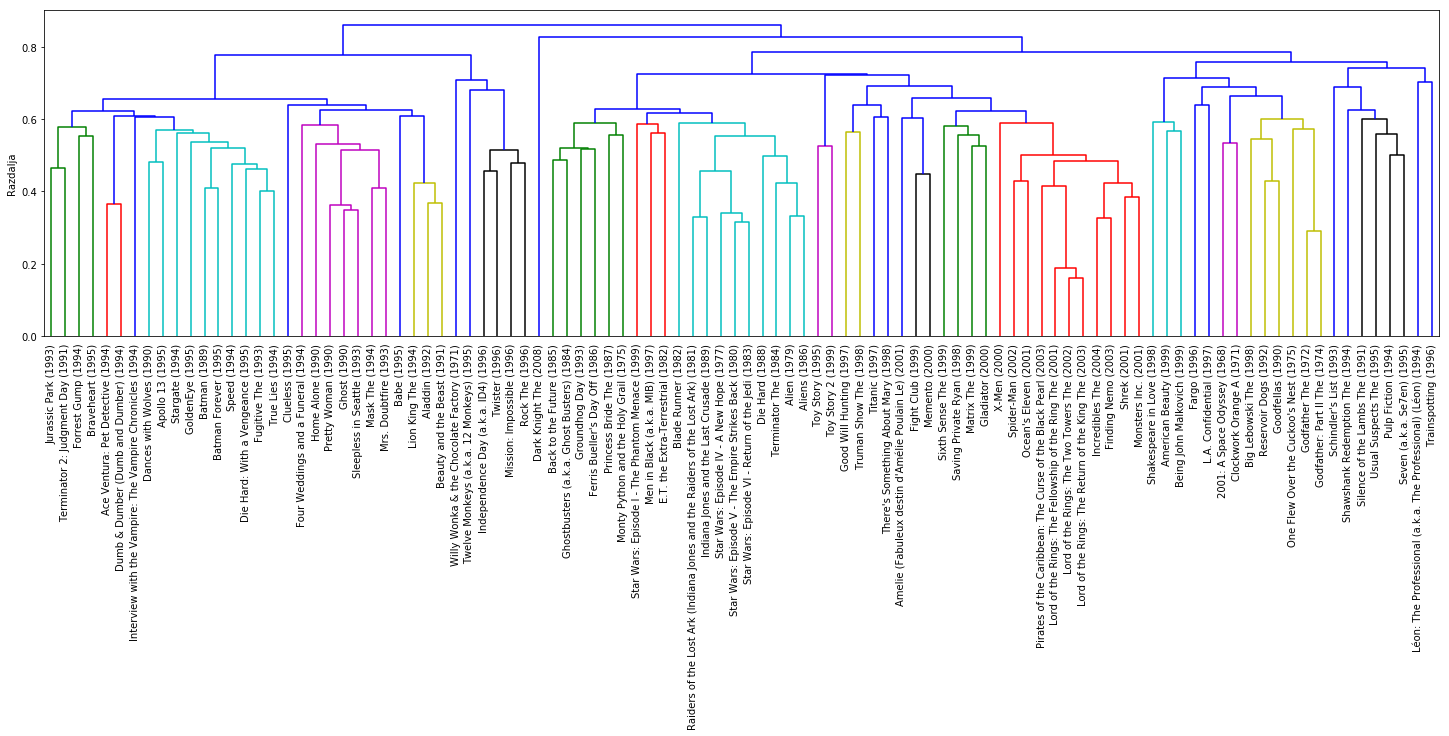

In [11]:
L = sch.linkage(data, method="average", metric="correlation")
plt.figure(figsize=(25, 6))
labels = [movies_title[i] for i in top100_allUser_movies_ratings.keys()]
D      = sch.dendrogram(L, labels=labels, leaf_font_size=10)
plt.ylabel("Razdalja")
plt.show()

Odgovor: **odgovor lahko zapišete v več celic**

Answer: **You can write the answer in multiple cells**

#### 2.4. vprašanje:

Komentiraj smiselnost dobljenih rezultatov.

#### 2.4. question:

Comment on the validity of the results obtained.

In [12]:
# kodo lahko razdelite v več celic

Odgovor: **Kmean je razdelil v 3 razrede. Za ocenjevanje teh razredov bi potrebovali testno množico kjer bi na podlagi št. ocen ugotovil kako dobra je ocena.**

**Kaže se da filmi z več ogledi so tudi bolje ocenjeni**

**hierarično gručenje pa grupira filme glede korelacije. Kateri filmi so bolj skupaj glede na ocena**

Answer: **You can write the answer in multiple cells**